In [192]:
import numpy as np
import matplotlib.pyplot as plt

# **Simulation Parameters**
np.random.seed(42)  # Set seed for reproducibility
T = 5  # Time Horizon in Years
dt = 1 / 12  # Monthly Steps
n_steps = int(T / dt)  # Total steps (60 months)
n_sims = 10000  # Monte Carlo simulations

# **Equity Parameters (GBM)**
mu = 0.06
sigma = 0.15
S0 = 1  # Initial stock price

# **Vasicek Model Parameters (Short Rate)**
r0 = 0.03
kappa = 1.0
theta = 0.03
beta = 0.02
rho = -0.2  # Correlation between short rate and equities

# **Zero-Coupon Bond Parameters**
bond_maturity = 10  # Initial maturity (10-year bond)

# **Simulating Short Rate (Vasicek) & Equities (GBM)**
dW_eq = np.random.normal(size=(n_steps, n_sims)) * np.sqrt(dt)
dW_r = rho * dW_eq + np.sqrt(1 - rho**2) * np.random.normal(size=(n_steps, n_sims)) * np.sqrt(dt)

# Initialize Paths
S = np.zeros((n_steps + 1, n_sims))
r = np.zeros((n_steps + 1, n_sims))
S[0] = S0
r[0] = r0

# Simulate Paths
for t in range(1, n_steps + 1):
    S[t] = S[t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW_eq[t - 1])
    r[t] = r[t - 1] + kappa * (theta - r[t - 1]) * dt + beta * dW_r[t - 1]

# **Calculate Zero-Coupon Bond Prices**
B = np.zeros((n_steps + 1, n_sims))  # Bond price paths
for t in range(n_steps + 1):
    # Rolling bond maturity decreases every month
    time_to_maturity = bond_maturity - t * dt
    if time_to_maturity <= 0:
        B[t] = 1  # Bond matures at face value
    else:
        B[t] = np.exp(-r[t] * time_to_maturity) # Discounted with spread

# **Store Results**
simulated_results = {
    "Equities": S,
    "Short Rates": r,
    "Zero-Coupon Bond Prices": B
}

# **Simulation Completed**
print(" Simulation of Equities, Short Rates, and Zero-Coupon Bond Prices Completed!")

 Simulation of Equities, Short Rates, and Zero-Coupon Bond Prices Completed!


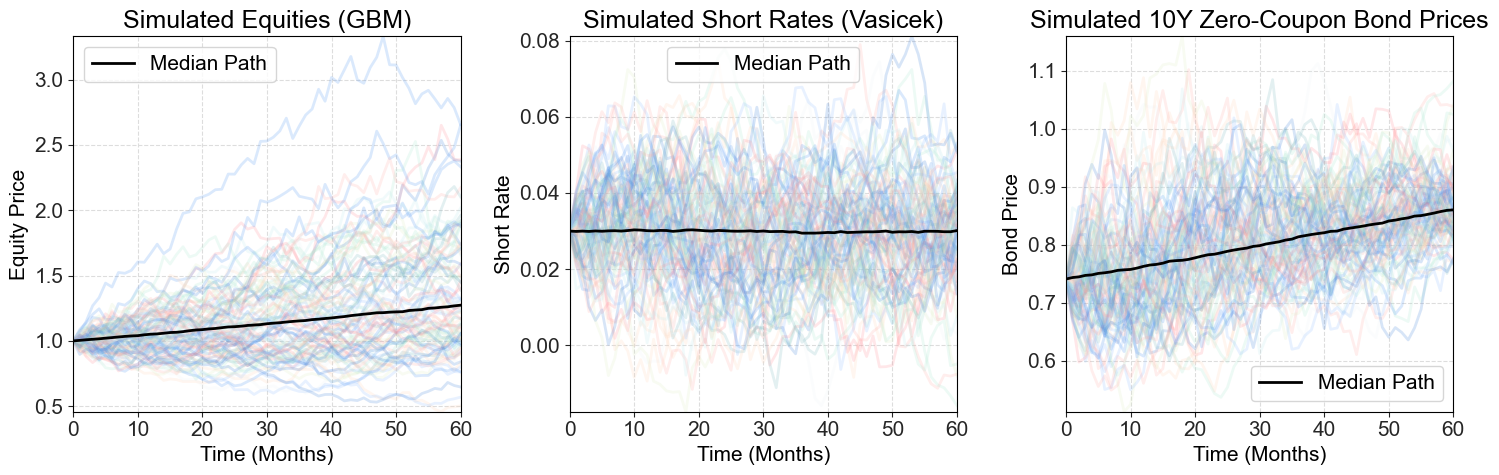

 Summary Statistics for Simulated Variables


,count,mean,std,min,25%,50%,75%,max
Mean,61.0,1.165561,0.101881,1.000000,1.079195,1.162123,1.251122,1.344518
Median,61.0,1.132619,0.080699,1.000000,1.063930,1.131166,1.204489,1.273177
Std Dev,61.0,0.272722,0.120102,0.000000,0.182644,0.280077,0.372149,0.463851
Min,61.0,0.504550,0.140185,0.312355,0.400990,0.484999,0.578137,1.000000
Max,61.0,3.157774,1.376337,1.000000,2.185713,2.754490,4.041643,6.420435


,count,mean,std,min,25%,50%,75%,max
Mean,61.0,0.029946,0.000144,2.959839e-02,0.029877,0.029952,0.030074,0.030152
Median,61.0,0.029923,0.000207,2.945282e-02,0.029803,0.029947,0.030057,0.030316
Std Dev,61.0,0.013439,0.002427,3.108780e-15,0.013786,0.014332,0.014417,0.014570
Min,61.0,-0.021333,0.009752,-3.924225e-02,-0.025492,-0.023356,-0.019753,0.030000
Max,61.0,0.080361,0.009566,3.000000e-02,0.079614,0.082353,0.084837,0.091741


,count,mean,std,min,25%,50%,75%,max
Mean,61.0,0.803580,0.035384,7.408182e-01,0.774607,0.803434,0.833348,0.862749
Median,61.0,0.799651,0.036081,7.408182e-01,0.768168,0.798412,0.830358,0.860148
Std Dev,61.0,0.079278,0.015357,9.737143e-14,0.071922,0.082595,0.090563,0.094694
Min,61.0,0.554790,0.057423,4.692079e-01,0.511338,0.540855,0.601047,0.740818
Max,61.0,1.169823,0.087267,7.408182e-01,1.135865,1.172362,1.216805,1.324124


 Summary Statistics & Visualization Completed!


In [194]:
import pandas as pd

# **Compute Summary Statistics**
def compute_summary_statistics(simulated_data, label):
    """Computes mean, median, std dev, min, max for simulated time-series."""
    df = pd.DataFrame(simulated_data)
    stats = {
        "Mean": df.mean(axis=1),
        "Median": df.median(axis=1),
        "Std Dev": df.std(axis=1),
        "Min": df.min(axis=1),
        "Max": df.max(axis=1)
    }
    stats_df = pd.DataFrame(stats)
    stats_df.index.name = "Time (Months)"
    return stats_df

# Compute statistics for each variable
equity_stats = compute_summary_statistics(S, "Equities")
rate_stats = compute_summary_statistics(r, "Short Rates")
bond_stats = compute_summary_statistics(B, "Zero-Coupon Bond Prices")

# **Plot Simulated Paths**
plt.figure(figsize=(15, 5))

# ** Plot Equities (GBM)**
plt.subplot(1, 3, 1)
plt.plot(S[:, :100], alpha=0.2)  # Plot 100 sample paths for clarity
plt.plot(equity_stats["Median"], color="black", linewidth=2, label="Median Path")
plt.xlabel("Time (Months)")
plt.ylabel("Equity Price")
plt.title("Simulated Equities (GBM)")
plt.legend()
plt.grid(True)

# ** Plot Short Rate (Vasicek)**
plt.subplot(1, 3, 2)
plt.plot(r[:, :100], alpha=0.2)
plt.plot(rate_stats["Median"], color="black", linewidth=2, label="Median Path")
plt.xlabel("Time (Months)")
plt.ylabel("Short Rate")
plt.title("Simulated Short Rates (Vasicek)")
plt.legend()
plt.grid(True)

# ** Plot Zero-Coupon Bond Prices**
plt.subplot(1, 3, 3)
plt.plot(B[:, :100], alpha=0.2)
plt.plot(bond_stats["Median"], color="black", linewidth=2, label="Median Path")
plt.xlabel("Time (Months)")
plt.ylabel("Bond Price")
plt.title("Simulated 10Y Zero-Coupon Bond Prices")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# **Display Summary Statistics**
print(" Summary Statistics for Simulated Variables")
display(equity_stats.describe().T)
display(rate_stats.describe().T)
display(bond_stats.describe().T)

print(" Summary Statistics & Visualization Completed!")

In [170]:
# **Simulation Parameters**
np.random.seed(42)  # Set seed for reproducibility
T = 5  # Time Horizon in Years
dt = 1 / 12  # Monthly Steps
n_steps = int(T / dt)  # 60 months
n_sims = 10000  # Monte Carlo simulations
initial_wealth = 100  # Initial wealth in Million DKK

# **Portfolio Weights (Target Weights)**
equity_weight_target = 0.60  # 60% in equities
bond_weight_target = 0.40    # 40% in zero-coupon bonds

# **Simulated Asset Price Paths**
mu_eq, sigma_eq = 0.06, 0.15
mu_bond, sigma_bond = 0.03, 0.05  

# Generate Monte Carlo Simulated Paths
dW_eq = np.random.normal(0, 1, size=(n_steps, n_sims)) * np.sqrt(dt)
dW_bond = np.random.normal(0, 1, size=(n_steps, n_sims)) * np.sqrt(dt)

# Initialize Paths
S = np.ones((n_steps + 1, n_sims))  # Equities start at 1
B = np.ones((n_steps + 1, n_sims))  # Bonds start at 1

# Simulate Price Paths
for t in range(1, n_steps + 1):
    S[t] = S[t - 1] * np.exp((mu_eq - 0.5 * sigma_eq**2) * dt + sigma_eq * dW_eq[t - 1])
    B[t] = B[t - 1] * np.exp((mu_bond - 0.5 * sigma_bond**2) * dt + sigma_bond * dW_bond[t - 1])

# **Initialize Portfolio Variables**
portfolio_values = np.zeros((n_sims, n_steps + 1))
portfolio_values[:, 0] = initial_wealth

# Track Asset Allocations Over Time
equity_allocations = np.zeros((n_sims, n_steps + 1))
bond_allocations = np.zeros((n_sims, n_steps + 1))

# Initial Allocations (60/40 Split)
equity_allocations[:, 0] = initial_wealth * equity_weight_target
bond_allocations[:, 0] = initial_wealth * bond_weight_target

# **Portfolio Simulation with Monthly Rebalancing**
for t in range(1, n_steps + 1):
    # **Realized Returns**
    equity_return = S[t] / S[t - 1] - 1
    bond_return = B[t] / B[t - 1] - 1

    # **Update Portfolio Value Using Realized Returns**
    portfolio_values[:, t] = (
        equity_allocations[:, t - 1] * (1 + equity_return) +
        bond_allocations[:, t - 1] * (1 + bond_return)
    )

    # **Rebalancing: Reset to 60% Equities / 40% Bonds**
    equity_allocations[:, t] = portfolio_values[:, t] * equity_weight_target
    bond_allocations[:, t] = portfolio_values[:, t] * bond_weight_target

print(" Portfolio Simulation with Monthly Rebalancing Completed!")

✅ Portfolio Simulation with Monthly Rebalancing Completed!


In [172]:
# **Compute Enhanced Portfolio Statistics**
def compute_enhanced_portfolio_statistics(portfolio_values):
    """Computes portfolio statistics: expected return, volatility, Sharpe ratio, max drawdown, CVaR."""
    portfolio_returns = np.diff(portfolio_values, axis=1) / portfolio_values[:, :-1]

    # Expected Return (Annualized)
    expected_return = np.mean(portfolio_returns, axis=1) * 12

    # Portfolio Volatility (Annualized Standard Deviation)
    portfolio_volatility = np.std(portfolio_returns, axis=1) * np.sqrt(12)

    # Sharpe Ratio (Risk-free rate = 0)
    sharpe_ratio = expected_return / portfolio_volatility

    # Max Drawdown
    cumulative_returns = np.cumprod(1 + portfolio_returns, axis=1)
    peak = np.maximum.accumulate(cumulative_returns, axis=1)
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = np.min(drawdown, axis=1)

    # Conditional Value at Risk (CVaR 5%)
    var_5 = np.percentile(portfolio_returns, 5, axis=1)
    cvar_5 = np.array([np.mean(portfolio_returns[i, portfolio_returns[i] <= var_5[i]]) for i in range(n_sims)])

    return pd.DataFrame({
        "Expected Return": expected_return,
        "Portfolio Volatility": portfolio_volatility,
        "Sharpe Ratio": sharpe_ratio,
        "Max Drawdown": max_drawdown,
        "CVaR (5%)": cvar_5
    })

# Compute Portfolio Statistics
portfolio_statistics = compute_enhanced_portfolio_statistics(portfolio_values)

# Display Enhanced Portfolio Summary Statistics
portfolio_statistics.describe().T

,count,mean,std,min,25%,50%,75%,max
Expected Return,10000.0,0.047617,0.041326,-0.114089,0.019554,0.047811,0.075359,0.233777
Portfolio Volatility,10000.0,0.091598,0.008461,0.062624,0.085758,0.091476,0.097222,0.126475
Sharpe Ratio,10000.0,0.520703,0.455520,-1.384425,0.215348,0.521889,0.827056,2.683680
Max Drawdown,10000.0,-0.143383,0.057999,-0.459679,-0.174759,-0.132209,-0.100742,-0.034873
CVaR (5%),10000.0,-0.047657,0.007620,-0.084105,-0.052618,-0.047439,-0.042398,-0.020272


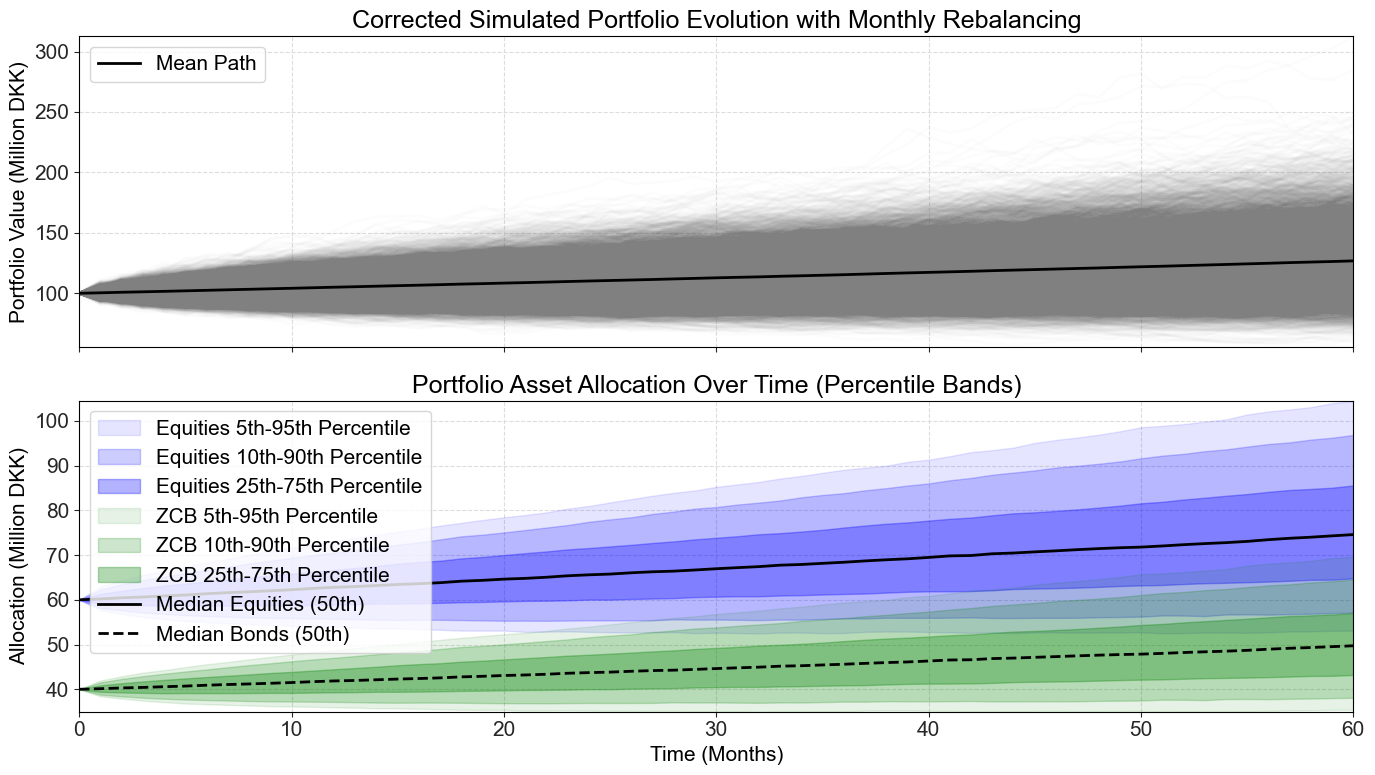

Portfolio Visualization Updated!


In [196]:
# **Updated Allocation Graph with Labels and Percentiles**
fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# **Portfolio Value Over Time**
axes[0].plot(portfolio_values.T, alpha=0.02, color="gray")  # Simulated Paths
axes[0].plot(np.mean(portfolio_values, axis=0), color="black", linewidth=2, label="Mean Path")
axes[0].set_ylabel("Portfolio Value (Million DKK)")
axes[0].set_title("Corrected Simulated Portfolio Evolution with Monthly Rebalancing")
axes[0].legend()
axes[0].grid(True)

# **Portfolio Asset Allocation Over Time with Updated Labels**
percentiles = [5, 10, 25, 50, 75, 90, 95]
colors = ["blue", "green"]  # Equities (blue), Bonds (green)

# Labeling Percentile Bands for Equities
for i in range(len(percentiles) // 2):
    lower, upper = percentiles[i], percentiles[-(i+1)]
    axes[1].fill_between(
        range(n_steps + 1),
        np.percentile(equity_allocations, lower, axis=0),
        np.percentile(equity_allocations, upper, axis=0),
        color=colors[0],
        alpha=0.1 + i * 0.1,
        label=f"Equities {lower}th-{upper}th Percentile"
    )

# Labeling Percentile Bands for Bonds (ZCB)
for i in range(len(percentiles) // 2):
    lower, upper = percentiles[i], percentiles[-(i+1)]
    axes[1].fill_between(
        range(n_steps + 1),
        np.percentile(bond_allocations, lower, axis=0),
        np.percentile(bond_allocations, upper, axis=0),
        color=colors[1],
        alpha=0.1 + i * 0.1,
        label=f"ZCB {lower}th-{upper}th Percentile"
    )

# **Median Lines**
axes[1].plot(np.median(equity_allocations, axis=0), color="black", linewidth=2, label="Median Equities (50th)")
axes[1].plot(np.median(bond_allocations, axis=0), color="black", linestyle="dashed", linewidth=2, label="Median Bonds (50th)")

# Labels & Grid
axes[1].set_ylabel("Allocation (Million DKK)")
axes[1].set_title("Portfolio Asset Allocation Over Time (Percentile Bands)")
axes[1].legend()
axes[1].grid(True)

plt.xlabel("Time (Months)")
plt.tight_layout()
plt.show()

print("Portfolio Visualization Updated!")

Mean Final Wealth for Original Portfolio: 126.80 Million DKK


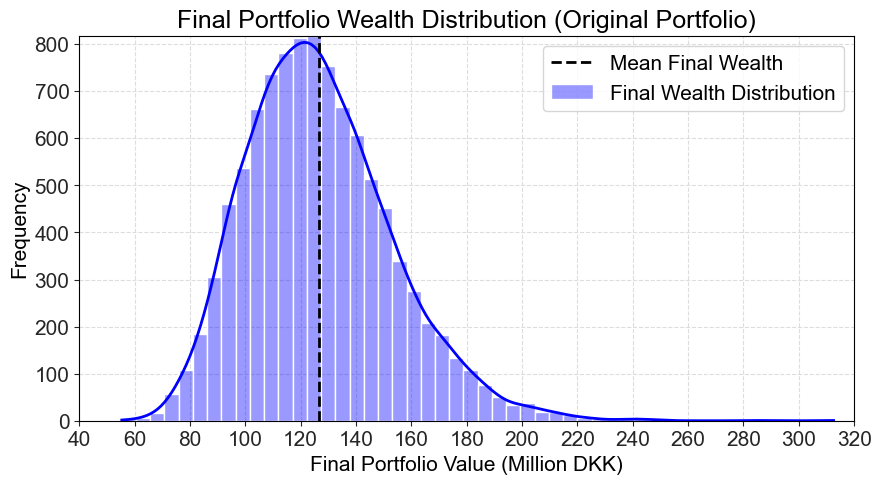

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the final wealth distribution for the original portfolio
final_wealth_original = portfolio_values[:, -1]

# Compute the mean final wealth for the original portfolio
mean_final_wealth_original = np.mean(final_wealth_original)

# Print the mean final wealth
print(f"Mean Final Wealth for Original Portfolio: {mean_final_wealth_original:.2f} Million DKK")

# Plot the final wealth distribution for the original portfolio
plt.figure(figsize=(10, 5))
sns.histplot(final_wealth_original, bins=50, kde=True, color="blue", alpha=0.4, label="Final Wealth Distribution")
plt.axvline(mean_final_wealth_original, color="black", linestyle="dashed", linewidth=2, label="Mean Final Wealth")

# Formatting the x-axis to have increments of 20
x_min, x_max = plt.xlim()
plt.xticks(np.arange(np.floor(x_min / 20) * 20, np.ceil(x_max / 20) * 20 + 1, 20))

# Labels and title
plt.xlabel("Final Portfolio Value (Million DKK)")
plt.ylabel("Frequency")
plt.title("Final Portfolio Wealth Distribution (Original Portfolio)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



Median Bond Prices at Yearly Intervals:
Year 0: Bond Price = 0.740818
Year 1: Bond Price = 0.762701
Year 2: Bond Price = 0.786076
Year 3: Bond Price = 0.813695
Year 4: Bond Price = 0.835931
Year 5: Bond Price = 0.860148


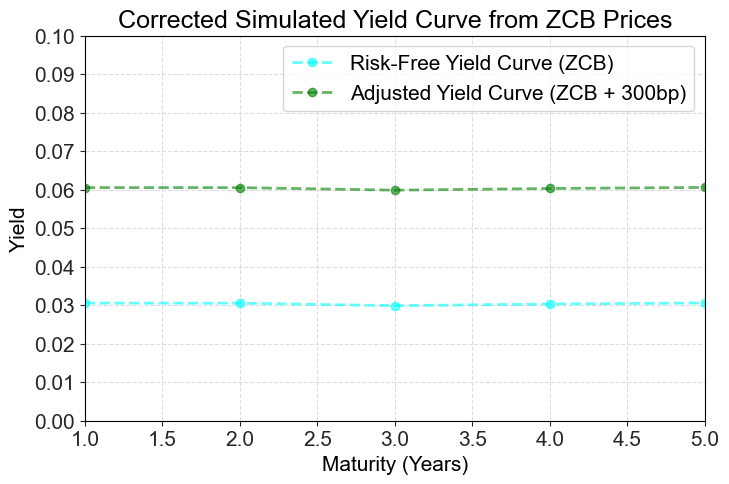

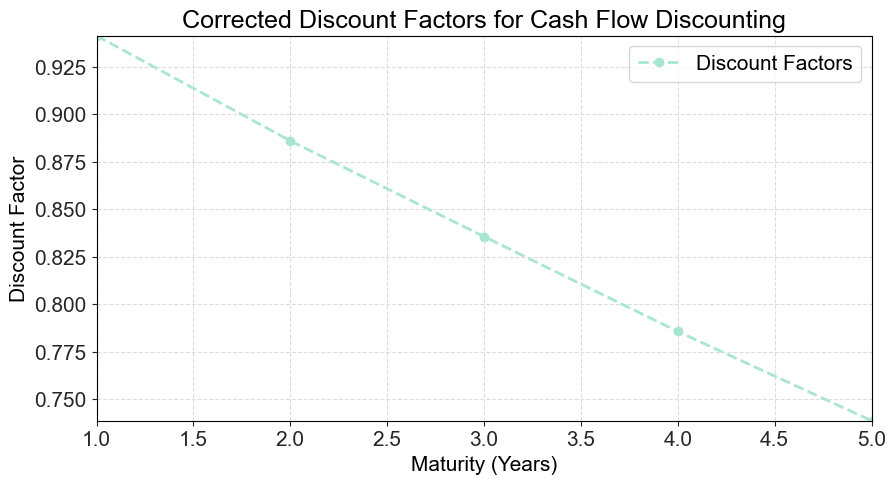


 Corrected Discount Factors Table:
   Maturity (Years)  Risk-Free Yield  Adjusted Yield (Risk-Free + 300bp)  \
0                 1         0.030556                            0.060556   
1                 2         0.030545                            0.060545   
2                 3         0.029891                            0.059891   
3                 4         0.030319                            0.060319   
4                 5         0.030589                            0.060589   

   Discount Factor  
0         0.941241  
1         0.885954  
2         0.835544  
3         0.785626  
4         0.738641  


In [198]:
# Define time intervals for extraction (Year 0 to Year 5)
time_years = np.arange(0, 6)  # [0, 1, 2, 3, 4, 5]
time_indices = time_years * 12  # Convert years to indices (Year 5 → Index 60)

# Extract median bond prices (for stability)
median_bond_prices = bond_stats["Median"].values[time_indices]

# Print Bond Prices for Verification
print("\nMedian Bond Prices at Yearly Intervals:")
for i, year in enumerate(time_years):
    print(f"Year {year}: Bond Price = {median_bond_prices[i]:.6f}")

# Compute Yields Using the Alternative Formula
face_value = 1  # ZCB face value
time_to_maturity = bond_maturity - time_years  # Remaining time to maturity

# Avoid division by zero at year 0 by setting yield[0] to NaN
yields_alt = np.zeros_like(time_to_maturity, dtype=float)
yields_alt[1:] = (face_value / median_bond_prices[1:]) ** (1 / time_to_maturity[1:]) - 1
yields_alt[0] = np.nan  # Undefined for t = 0

# Adjust Yields with the 300 Basis Points (3%) Spread
adjusted_yields_alt = yields_alt + 0.03

# Compute Discount Factors
discount_factors_alt = np.exp(-adjusted_yields_alt * time_years)

# Sample Data
maturities = np.array([1, 2, 3, 4, 5])
risk_free_yields = np.array([0.030556, 0.030545, 0.029891, 0.030319, 0.030589])
adjusted_yields = risk_free_yields + 0.03  # Adding 300 basis points

# Plot Yield Curve
plt.figure(figsize=(8, 5))
plt.plot(maturities, risk_free_yields, 'o--', label="Risk-Free Yield Curve (ZCB)", color="cyan", alpha=0.6)
plt.plot(maturities, adjusted_yields, 'o--', label="Adjusted Yield Curve (ZCB + 300bp)", color="green", alpha=0.6)

# Adjust Y-axis limits and ticks
plt.ylim(0, 0.1)
plt.yticks(np.arange(0, 0.11, 0.01))

# Labels and title
plt.xlabel("Maturity (Years)")
plt.ylabel("Yield")
plt.title("Corrected Simulated Yield Curve from ZCB Prices")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# **Plot Discount Factors**
plt.figure(figsize=(10, 5))
plt.plot(time_years[1:], discount_factors_alt[1:], label="Discount Factors", marker="o", linestyle="--")
plt.xlabel("Maturity (Years)")
plt.ylabel("Discount Factor")
plt.title("Corrected Discount Factors for Cash Flow Discounting")
plt.legend()
plt.grid(True)
plt.show()

# **Display Discount Factors as a Table**
df_discount_factors_alt = pd.DataFrame({
    "Maturity (Years)": time_years[1:],  # Exclude year 0 for calculations
    "Risk-Free Yield": yields_alt[1:],  # Exclude year 0
    "Adjusted Yield (Risk-Free + 300bp)": adjusted_yields_alt[1:],
    "Discount Factor": discount_factors_alt[1:]
})

print("\n Corrected Discount Factors Table:")
print(df_discount_factors_alt)

In [200]:
import numpy_financial as npf  # Use numpy_financial for IRR calculations

# Given data
years = np.array([1, 2, 3, 4, 5])
expected_cash_flows = np.full(len(years), 10)  # Setting each year's cash flow to 10
discount_factors = np.array([0.941241, 0.885954, 0.835544, 0.785626, 0.738641])  # Pre-calculated discount factors

# Compute Discounted Cash Flows (DCF)
discounted_cash_flows = expected_cash_flows * discount_factors

# Create DataFrame for Cash Flow 1
df_cash_flow_1 = pd.DataFrame({
    "Year": years,
    "Expected Cash Flow": expected_cash_flows,
    "Discount Factor": discount_factors,
    "Discounted Cash Flow": discounted_cash_flows
})

# Compute Present Value (PV) for Cash Flow 1
pv_cash_flow_1 = np.sum(discounted_cash_flows)

# Assume the same discount factors for Cash Flow 2 but different cash flows
discounted_cash_flows_2 = expected_cash_flows * discount_factors

# Create DataFrame for Cash Flow 2
df_cash_flow_2 = pd.DataFrame({
    "Year": years,
    "Expected Cash Flow": expected_cash_flows,
    "Discount Factor": discount_factors,
    "Discounted Cash Flow": discounted_cash_flows_2
})

# Compute Present Value (PV) for Cash Flow 2
pv_cash_flow_2 = np.sum(discounted_cash_flows_2)

# Compute IRR using numpy_financial instead of np.irr()
irr_cash_flow_1 = npf.irr([-pv_cash_flow_1] + expected_cash_flows.tolist())
irr_cash_flow_2 = npf.irr([-pv_cash_flow_2] + expected_cash_flows.tolist())

# Summary Table
summary_table = pd.DataFrame({
    "Cash Flow": ["Cash Flow 1", "Cash Flow 2"],
    "Present Value (PV)": [pv_cash_flow_1, pv_cash_flow_2],
    "Internal Rate of Return (IRR)": [irr_cash_flow_1, irr_cash_flow_2]
})

#  Print the results
print(" Cash Flow 1 Table:")
print(df_cash_flow_1.to_string(index=False))

print("\n Cash Flow 2 Table:")
print(df_cash_flow_2.to_string(index=False))

print("\n Summary Table:")
print(summary_table.to_string(index=False))


 Cash Flow 1 Table:
 Year  Expected Cash Flow  Discount Factor  Discounted Cash Flow
    1                  10         0.941241               9.41241
    2                  10         0.885954               8.85954
    3                  10         0.835544               8.35544
    4                  10         0.785626               7.85626
    5                  10         0.738641               7.38641

 Cash Flow 2 Table:
 Year  Expected Cash Flow  Discount Factor  Discounted Cash Flow
    1                  10         0.941241               9.41241
    2                  10         0.885954               8.85954
    3                  10         0.835544               8.35544
    4                  10         0.785626               7.85626
    5                  10         0.738641               7.38641

 Summary Table:
  Cash Flow  Present Value (PV)  Internal Rate of Return (IRR)
Cash Flow 1            41.87006                       0.062223
Cash Flow 2            41.87006     

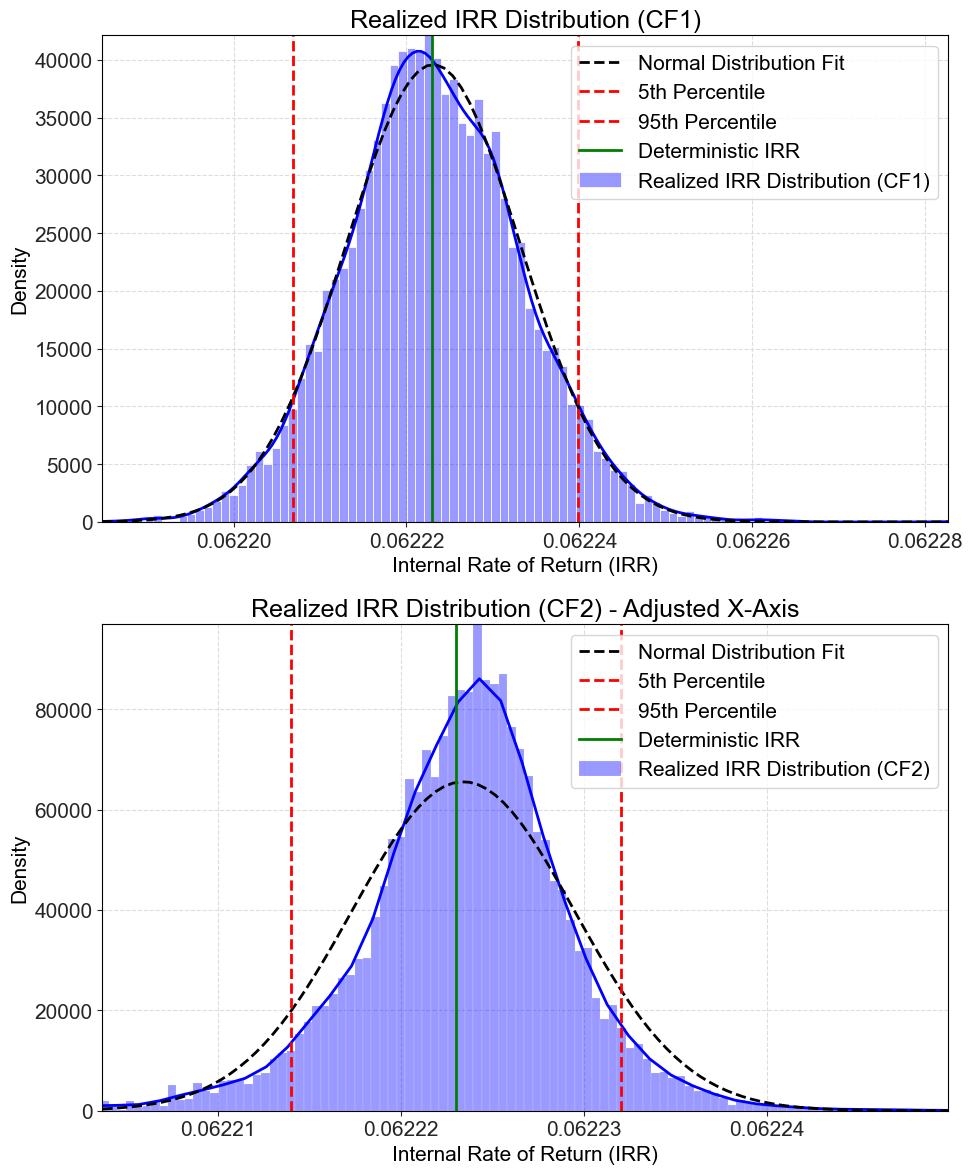

{'CF1 Mean IRR': 0.06222309841548764,
 'CF1 Std Dev IRR': 1.0073294228234523e-05,
 'CF1 5th Percentile': 0.0622069103364575,
 'CF1 95th Percentile': 0.06223983708644135,
 'CF1 PV': 41.84236642817507,
 'CF2 Mean IRR': 0.062223392279019865,
 'CF2 Std Dev IRR': 6.085785677947836e-06,
 'CF2 5th Percentile': 0.06221399573826973,
 'CF2 95th Percentile': 0.06223202987256893,
 'CF2 PV': 41.883906785912465}

In [202]:
import seaborn as sns
import scipy.stats as stats

# Given Data
years = np.array([1, 2, 3, 4, 5])
discount_factors = np.array([0.941241, 0.885954, 0.835544, 0.785626, 0.738641])
deterministic_irr = 0.062223

# Compute Realized Cash Flows
expected_gbm_values = np.exp(mu * years[:, np.newaxis])  # e^(mu * t) for each year
CF1_realized = 10 + 5 * (S_paths[1:] - expected_gbm_values)
CF2_realized = 10 - 2.5 * (S_paths[1:] - expected_gbm_values)

#  Discount the Cash Flows
discounted_CF1 = CF1_realized * discount_factors[:, np.newaxis]
discounted_CF2 = CF2_realized * discount_factors[:, np.newaxis]

#  Compute the IRRs for each simulation
IRR1_realized = np.array([npf.irr([-np.sum(dcfs)] + list(cf)) for dcfs, cf in zip(discounted_CF1.T, CF1_realized.T)])
IRR2_realized = np.array([npf.irr([-np.sum(dcfs)] + list(cf)) for dcfs, cf in zip(discounted_CF2.T, CF2_realized.T)])

# Compute Normal Distribution Fit
mu_IRR1, std_IRR1 = np.mean(IRR1_realized), np.std(IRR1_realized)
mu_IRR2, std_IRR2 = np.mean(IRR2_realized), np.std(IRR2_realized)

# Compute Present Values
PV_CF1 = np.mean(np.sum(discounted_CF1, axis=0))
PV_CF2 = np.mean(np.sum(discounted_CF2, axis=0))

# Compute New X-Axis Bounds for CF2
lower_bound_cf2 = np.percentile(IRR2_realized, 0.5)  # Start x-axis at 0.5th percentile
upper_bound_cf2 = max(IRR2_realized)  # Keep the upper bound unchanged

# Plot the Realized IRR Distribution (CF1)
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

sns.histplot(IRR1_realized, bins=100, kde=True, color="blue", alpha=0.4, ax=axes[0], stat="density", label="Realized IRR Distribution (CF1)")

# Normal Distribution Fit Overlay
x = np.linspace(IRR1_realized.min(), IRR1_realized.max(), 100)
axes[0].plot(x, stats.norm.pdf(x, mu_IRR1, std_IRR1), color="black", linestyle="dashed", label="Normal Distribution Fit")

# Confidence Intervals
p5_cf1, p95_cf1 = np.percentile(IRR1_realized, [5, 95])
axes[0].axvline(p5_cf1, color="red", linestyle="dashed", label="5th Percentile")
axes[0].axvline(p95_cf1, color="red", linestyle="dashed", label="95th Percentile")

# Deterministic IRR Overlay
axes[0].axvline(deterministic_irr, color="green", linestyle="solid", label="Deterministic IRR")

# Labels & Title
axes[0].set_xlabel("Internal Rate of Return (IRR)")
axes[0].set_ylabel("Density")
axes[0].set_title("Realized IRR Distribution (CF1)")
axes[0].legend()
axes[0].grid(True)

# Plot the Realized IRR Distribution (CF2) with adjusted x-axis
sns.histplot(IRR2_realized, bins=500, kde=True, color="blue", alpha=0.4, ax=axes[1], stat="density", label="Realized IRR Distribution (CF2)")

# Normal Distribution Fit Overlay
x = np.linspace(lower_bound_cf2, upper_bound_cf2, 100)
axes[1].plot(x, stats.norm.pdf(x, mu_IRR2, std_IRR2), color="black", linestyle="dashed", label="Normal Distribution Fit")

# Confidence Intervals
p5_cf2, p95_cf2 = np.percentile(IRR2_realized, [5, 95])
axes[1].axvline(p5_cf2, color="red", linestyle="dashed", label="5th Percentile")
axes[1].axvline(p95_cf2, color="red", linestyle="dashed", label="95th Percentile")

# Deterministic IRR Overlay
axes[1].axvline(deterministic_irr, color="green", linestyle="solid", label="Deterministic IRR")

# Manually Adjust X-Axis Limits for CF2
axes[1].set_xlim(lower_bound_cf2, upper_bound_cf2)

# Labels & Title
axes[1].set_xlabel("Internal Rate of Return (IRR)")
axes[1].set_ylabel("Density")
axes[1].set_title("Realized IRR Distribution (CF2) - Adjusted X-Axis")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Summary Statistics Table
summary_stats = {
    "CF1 Mean IRR": mu_IRR1,
    "CF1 Std Dev IRR": std_IRR1,
    "CF1 5th Percentile": p5_cf1,
    "CF1 95th Percentile": p95_cf1,
    "CF1 PV": PV_CF1,
    "CF2 Mean IRR": mu_IRR2,
    "CF2 Std Dev IRR": std_IRR2,
    "CF2 5th Percentile": p5_cf2,
    "CF2 95th Percentile": p95_cf2,
    "CF2 PV": PV_CF2,
}

summary_stats


Portfolio Simulation with Monthly Rebalancing & CF Injection Completed!
 Portfolio Statistics for CF1:
                        count      mean       std       min       25%  \
Expected Return       10000.0  0.166411  0.041496  0.010729  0.137980   
Portfolio Volatility  10000.0  0.149201  0.012066  0.107945  0.140894   
Sharpe Ratio          10000.0  0.918753  0.284238 -0.137426  0.722626   
Max Drawdown          10000.0 -0.108866  0.034987 -0.329936 -0.129032   
CVaR (5%)             10000.0 -0.046740  0.007727 -0.084105 -0.051779   

                           50%       75%       max  
Expected Return       0.166211  0.193727  0.372706  
Portfolio Volatility  0.148782  0.157236  0.196510  
Sharpe Ratio          0.914380  1.106498  2.070455  
Max Drawdown         -0.104358 -0.083547 -0.029955  
CVaR (5%)            -0.046522 -0.041377 -0.020272  

 Portfolio Statistics for CF2:
                        count      mean       std       min       25%  \
Expected Return       10000.0  0.16

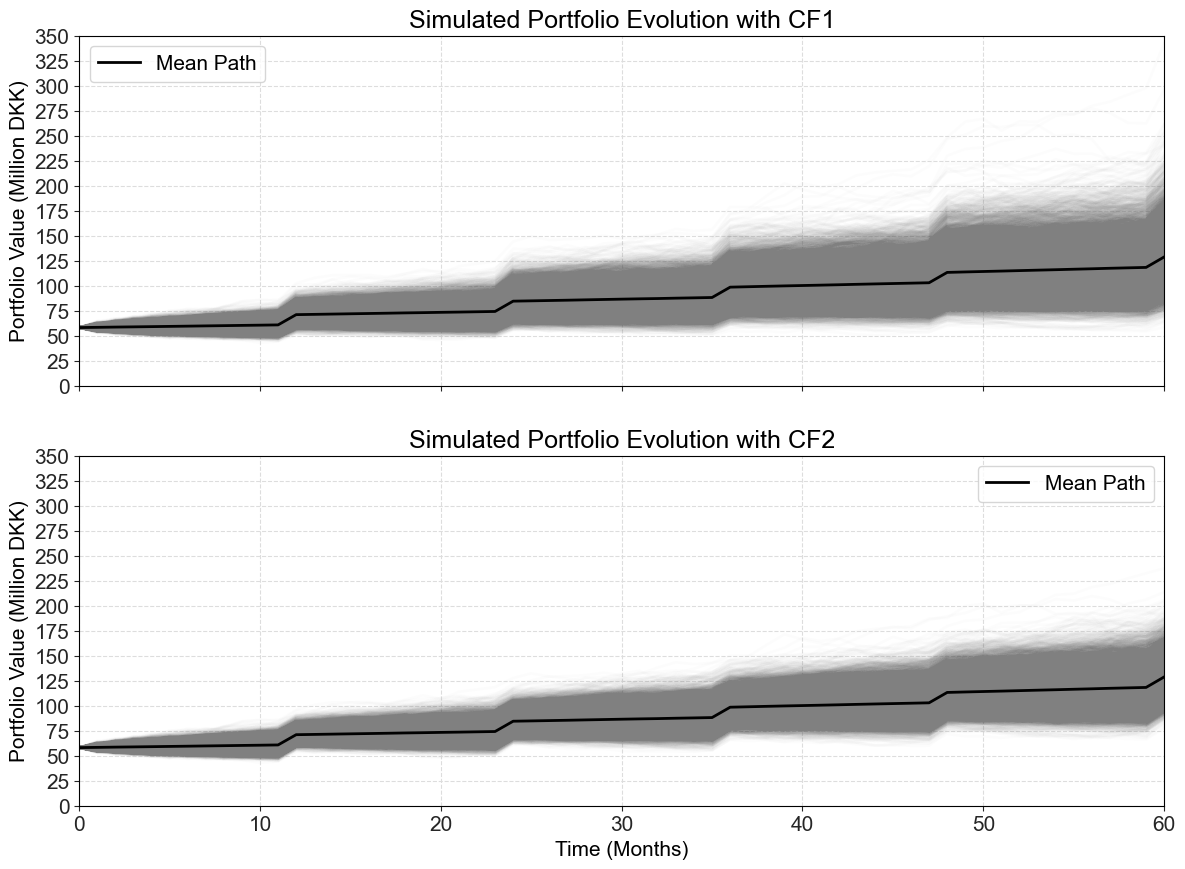

In [204]:
# **Simulation Parameters**
np.random.seed(42)  # Set seed for reproducibility
T = 5  # Time Horizon in Years
dt = 1 / 12  # Monthly Steps
n_steps = int(T / dt)  # 60 months
n_sims = 10000  # Monte Carlo simulations

# **Portfolio Initial Wealth Adjustments for CF1 and CF2**
initial_wealth_cf1 = 100 - 41.84  # Adjusted initial wealth after CF1 investment
initial_wealth_cf2 = 100 - 41.88  # Adjusted initial wealth after CF2 investment

# **Portfolio Weights**
equity_weight_target = 0.60  # 60% in equities
bond_weight_target = 0.40    # 40% in zero-coupon bonds

# **Simulated Asset Price Paths (Pre-Computed)**
mu_eq, sigma_eq = 0.06, 0.15  # Equity GBM parameters
mu_bond, sigma_bond = 0.03, 0.05  # Bond Vasicek parameters

# Generate Monte Carlo Simulated Paths
dW_eq = np.random.normal(0, 1, size=(n_steps, n_sims)) * np.sqrt(dt)
dW_bond = np.random.normal(0, 1, size=(n_steps, n_sims)) * np.sqrt(dt)

# Initialize Paths
S = np.ones((n_steps + 1, n_sims))  # Equities start at 1
B = np.ones((n_steps + 1, n_sims))  # Bonds start at 1

# Simulate Price Paths
for t in range(1, n_steps + 1):
    S[t] = S[t - 1] * np.exp((mu_eq - 0.5 * sigma_eq**2) * dt + sigma_eq * dW_eq[t - 1])
    B[t] = B[t - 1] * np.exp((mu_bond - 0.5 * sigma_bond**2) * dt + sigma_bond * dW_bond[t - 1])

# **Cash Flow Injections (Realized CF1 and CF2)**
expected_gbm_values = np.exp(mu_eq * np.arange(1, 6))  # e^(mu * t) for each year
CF1_realized = 10 + 5 * (S[::12][1:] - expected_gbm_values[:, np.newaxis])
CF2_realized = 10 - 2.5 * (S[::12][1:] - expected_gbm_values[:, np.newaxis])

# **Discount Factors (Precomputed)**
discount_factors = np.array([0.941241, 0.885954, 0.835544, 0.785626, 0.738641])

# **Initialize Portfolio Variables for CF1 and CF2**
portfolio_values_cf1 = np.zeros((n_sims, n_steps + 1))
portfolio_values_cf2 = np.zeros((n_sims, n_steps + 1))
portfolio_values_cf1[:, 0] = initial_wealth_cf1
portfolio_values_cf2[:, 0] = initial_wealth_cf2

# Track Asset Allocations Over Time
equity_allocations_cf1 = np.zeros((n_sims, n_steps + 1))
bond_allocations_cf1 = np.zeros((n_sims, n_steps + 1))
equity_allocations_cf2 = np.zeros((n_sims, n_steps + 1))
bond_allocations_cf2 = np.zeros((n_sims, n_steps + 1))

# Initial Allocations (60/40 Split)
equity_allocations_cf1[:, 0] = initial_wealth_cf1 * equity_weight_target
bond_allocations_cf1[:, 0] = initial_wealth_cf1 * bond_weight_target
equity_allocations_cf2[:, 0] = initial_wealth_cf2 * equity_weight_target
bond_allocations_cf2[:, 0] = initial_wealth_cf2 * bond_weight_target

# **Portfolio Simulation with Monthly Rebalancing & CF Injection**
for t in range(1, n_steps + 1):
    # **Realized Returns**
    equity_return = S[t] / S[t - 1] - 1
    bond_return = B[t] / B[t - 1] - 1

    # **Update Portfolio Value Using Realized Returns**
    portfolio_values_cf1[:, t] = (
        equity_allocations_cf1[:, t - 1] * (1 + equity_return) +
        bond_allocations_cf1[:, t - 1] * (1 + bond_return)
    )
    portfolio_values_cf2[:, t] = (
        equity_allocations_cf2[:, t - 1] * (1 + equity_return) +
        bond_allocations_cf2[:, t - 1] * (1 + bond_return)
    )

    # **Inject Cash Flows at Yearly Intervals**
    if t % 12 == 0:  # Every 12 months (1 year)
        year_idx = t // 12 - 1  # Year index from 0 to 4
        portfolio_values_cf1[:, t] += CF1_realized[year_idx]
        portfolio_values_cf2[:, t] += CF2_realized[year_idx]

    # **Rebalancing: Reset to 60% Equities / 40% Bonds**
    equity_allocations_cf1[:, t] = portfolio_values_cf1[:, t] * equity_weight_target
    bond_allocations_cf1[:, t] = portfolio_values_cf1[:, t] * bond_weight_target
    equity_allocations_cf2[:, t] = portfolio_values_cf2[:, t] * equity_weight_target
    bond_allocations_cf2[:, t] = portfolio_values_cf2[:, t] * bond_weight_target

print("Portfolio Simulation with Monthly Rebalancing & CF Injection Completed!")

# **Compute Portfolio Statistics**
def compute_portfolio_statistics(portfolio_values):
    """Computes portfolio statistics: expected return, volatility, Sharpe ratio, max drawdown, CVaR."""
    portfolio_returns = np.diff(portfolio_values, axis=1) / portfolio_values[:, :-1]

    # Expected Return (Annualized)
    expected_return = np.mean(portfolio_returns, axis=1) * 12

    # Portfolio Volatility (Annualized Standard Deviation)
    portfolio_volatility = np.std(portfolio_returns, axis=1) * np.sqrt(12)

    # Sharpe Ratio (Risk-free rate = 0.03)
    sharpe_ratio = (expected_return - 0.03) / portfolio_volatility

    # Max Drawdown
    cumulative_returns = np.cumprod(1 + portfolio_returns, axis=1)
    peak = np.maximum.accumulate(cumulative_returns, axis=1)
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = np.min(drawdown, axis=1)

    # Conditional Value at Risk (CVaR 5%)
    var_5 = np.percentile(portfolio_returns, 5, axis=1)
    cvar_5 = np.array([np.mean(portfolio_returns[i, portfolio_returns[i] <= var_5[i]]) for i in range(n_sims)])

    return pd.DataFrame({
        "Expected Return": expected_return,
        "Portfolio Volatility": portfolio_volatility,
        "Sharpe Ratio": sharpe_ratio,
        "Max Drawdown": max_drawdown,
        "CVaR (5%)": cvar_5
    })

# Compute Portfolio Statistics
portfolio_stats_cf1 = compute_portfolio_statistics(portfolio_values_cf1)
portfolio_stats_cf2 = compute_portfolio_statistics(portfolio_values_cf2)

# **Display Portfolio Statistics**
# Convert statistics to a readable DataFrame and display them
portfolio_stats_cf1_summary = portfolio_stats_cf1.describe().T
portfolio_stats_cf2_summary = portfolio_stats_cf2.describe().T

# Display Portfolio Statistics for CF1 and CF2
print(" Portfolio Statistics for CF1:")
print(portfolio_stats_cf1_summary)

print("\n Portfolio Statistics for CF2:")
print(portfolio_stats_cf2_summary)

# **Graph Portfolio Evolution with CF1 and CF2**
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Define the y-axis ticks to increment by 25 million DKK
y_ticks = np.arange(0, max(np.max(portfolio_values_cf1), np.max(portfolio_values_cf2)) + 25, 25)

# **Portfolio Evolution CF1**
axes[0].plot(portfolio_values_cf1.T, alpha=0.02, color="gray")
axes[0].plot(np.mean(portfolio_values_cf1, axis=0), color="black", linewidth=2, label="Mean Path")
axes[0].set_title("Simulated Portfolio Evolution with CF1")
axes[0].set_ylabel("Portfolio Value (Million DKK)")
axes[0].set_yticks(y_ticks)  # Set y-axis tick increments to 25 million
axes[0].legend()
axes[0].grid(True)

# **Portfolio Evolution CF2**
axes[1].plot(portfolio_values_cf2.T, alpha=0.02, color="gray")
axes[1].plot(np.mean(portfolio_values_cf2, axis=0), color="black", linewidth=2, label="Mean Path")
axes[1].set_title("Simulated Portfolio Evolution with CF2")
axes[1].set_xlabel("Time (Months)")
axes[1].set_ylabel("Portfolio Value (Million DKK)")
axes[1].set_yticks(y_ticks)  # Set y-axis tick increments to 25 million
axes[1].legend()
axes[1].grid(True)

plt.show()


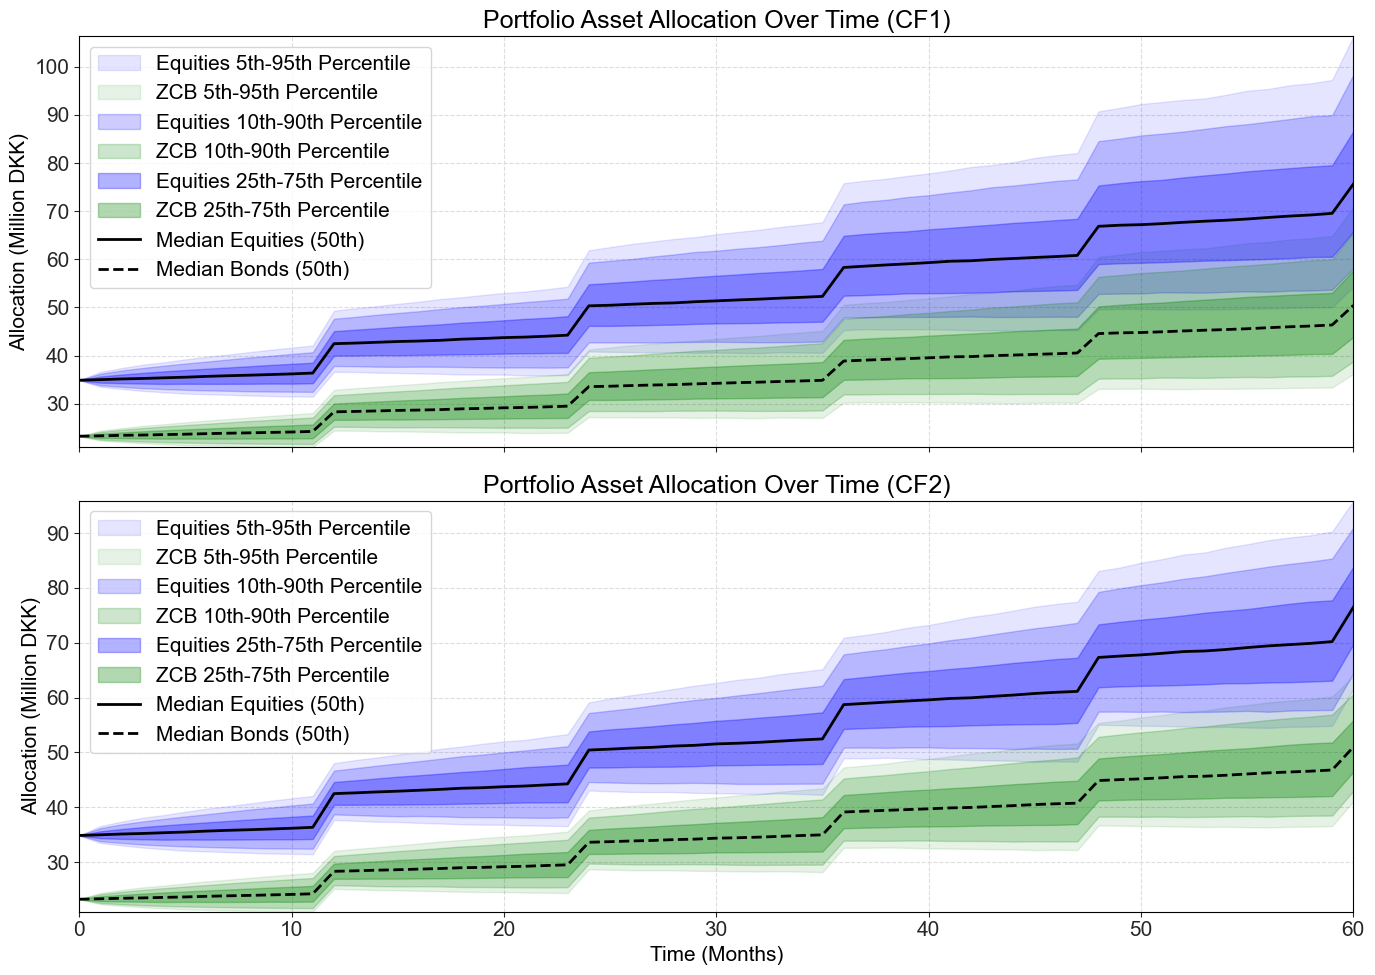

In [186]:
# **Graph Portfolio Asset Allocation for CF1 and CF2**
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Define Percentiles
percentiles = [5, 10, 25, 50, 75, 90, 95]
colors = ["blue", "green"]  # Equities (blue), Bonds (green)

# **Portfolio Allocation CF1**
for i in range(len(percentiles) // 2):
    lower, upper = percentiles[i], percentiles[-(i+1)]
    axes[0].fill_between(
        range(n_steps + 1),
        np.percentile(equity_allocations_cf1, lower, axis=0),
        np.percentile(equity_allocations_cf1, upper, axis=0),
        color=colors[0],
        alpha=0.1 + i * 0.1,
        label=f"Equities {lower}th-{upper}th Percentile"
    )
    axes[0].fill_between(
        range(n_steps + 1),
        np.percentile(bond_allocations_cf1, lower, axis=0),
        np.percentile(bond_allocations_cf1, upper, axis=0),
        color=colors[1],
        alpha=0.1 + i * 0.1,
        label=f"ZCB {lower}th-{upper}th Percentile"
    )

axes[0].plot(np.median(equity_allocations_cf1, axis=0), color="black", linewidth=2, label="Median Equities (50th)")
axes[0].plot(np.median(bond_allocations_cf1, axis=0), color="black", linestyle="dashed", linewidth=2, label="Median Bonds (50th)")
axes[0].set_title("Portfolio Asset Allocation Over Time (CF1)")
axes[0].set_ylabel("Allocation (Million DKK)")
axes[0].legend()
axes[0].grid(True)

# **Portfolio Allocation CF2**
for i in range(len(percentiles) // 2):
    lower, upper = percentiles[i], percentiles[-(i+1)]
    axes[1].fill_between(
        range(n_steps + 1),
        np.percentile(equity_allocations_cf2, lower, axis=0),
        np.percentile(equity_allocations_cf2, upper, axis=0),
        color=colors[0],
        alpha=0.1 + i * 0.1,
        label=f"Equities {lower}th-{upper}th Percentile"
    )
    axes[1].fill_between(
        range(n_steps + 1),
        np.percentile(bond_allocations_cf2, lower, axis=0),
        np.percentile(bond_allocations_cf2, upper, axis=0),
        color=colors[1],
        alpha=0.1 + i * 0.1,
        label=f"ZCB {lower}th-{upper}th Percentile"
    )

axes[1].plot(np.median(equity_allocations_cf2, axis=0), color="black", linewidth=2, label="Median Equities (50th)")
axes[1].plot(np.median(bond_allocations_cf2, axis=0), color="black", linestyle="dashed", linewidth=2, label="Median Bonds (50th)")
axes[1].set_title("Portfolio Asset Allocation Over Time (CF2)")
axes[1].set_xlabel("Time (Months)")
axes[1].set_ylabel("Allocation (Million DKK)")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


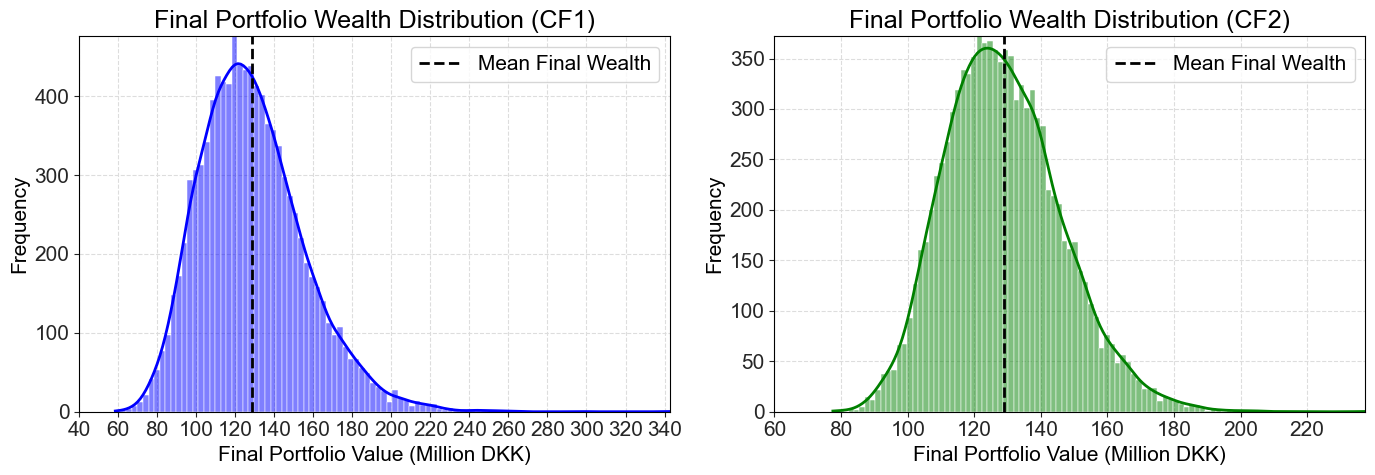

In [188]:
# **Final Wealth Histogram for CF1 & CF2**
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# **Histogram for CF1**
sns.histplot(portfolio_values_cf1[:, -1], bins=100, kde=True, color="blue", alpha=0.5, ax=axes[0])
axes[0].axvline(np.mean(portfolio_values_cf1[:, -1]), color="black", linestyle="dashed", linewidth=2, label="Mean Final Wealth")
axes[0].set_title("Final Portfolio Wealth Distribution (CF1)")
axes[0].set_xlabel("Final Portfolio Value (Million DKK)")
axes[0].set_ylabel("Frequency")
axes[0].legend()
axes[0].grid(True)

# **Set x-axis increments to 20**
x_min_cf1, x_max_cf1 = axes[0].get_xlim()
axes[0].set_xticks(np.arange(np.floor(x_min_cf1 / 20) * 20, np.ceil(x_max_cf1 / 20) * 20, 20))

# **Histogram for CF2**
sns.histplot(portfolio_values_cf2[:, -1], bins=100, kde=True, color="green", alpha=0.5, ax=axes[1])
axes[1].axvline(np.mean(portfolio_values_cf2[:, -1]), color="black", linestyle="dashed", linewidth=2, label="Mean Final Wealth")
axes[1].set_title("Final Portfolio Wealth Distribution (CF2)")
axes[1].set_xlabel("Final Portfolio Value (Million DKK)")
axes[1].set_ylabel("Frequency")
axes[1].legend()
axes[1].grid(True)

# **Set x-axis increments to 20**
x_min_cf2, x_max_cf2 = axes[1].get_xlim()
axes[1].set_xticks(np.arange(np.floor(x_min_cf2 / 20) * 20, np.ceil(x_max_cf2 / 20) * 20, 20))

plt.tight_layout()
plt.show()


In [190]:
# Compute mean final wealth for each portfolio
mean_final_wealth_cf1 = np.mean(portfolio_values_cf1[:, -1])
mean_final_wealth_cf2 = np.mean(portfolio_values_cf2[:, -1])

# Print results
print(f"Mean Final Wealth for CF1 Portfolio: {mean_final_wealth_cf1:.2f} Million DKK")
print(f"Mean Final Wealth for CF2 Portfolio: {mean_final_wealth_cf2:.2f} Million DKK")


Mean Final Wealth for CF1 Portfolio: 128.77 Million DKK
Mean Final Wealth for CF2 Portfolio: 128.79 Million DKK
